In [1]:
import numpy as np

from transformations import (
    ComposeDouble,
    FunctionWrapperDouble,
    create_dense_target,
    normalize_01,
)
from customdatasets import SegmentationDataSet1
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import pathlib

# root directory
root = pathlib.Path.cwd() / "Carvana"


def get_filenames_of_path(path: pathlib.Path, ext: str = "*"):
    """Returns a list of files in a directory/path. Uses pathlib."""
    filenames = [file for file in path.glob(ext) if file.is_file()]
    return filenames


# input and target files
inputs = get_filenames_of_path(root / "Input")
targets = get_filenames_of_path(root / "Target")

# training transformations and augmentations
transforms = ComposeDouble(
    [
        FunctionWrapperDouble(create_dense_target, input=False, target=True),
        FunctionWrapperDouble(
            np.moveaxis, input=True, target=False, source=-1, destination=0
        ),
        FunctionWrapperDouble(normalize_01),
    ]
)

# random seed
random_seed = 42

# split dataset into training set and validation set
train_size = 0.8  # 80:20 split

inputs_train, inputs_valid = train_test_split(
    inputs, random_state=random_seed, train_size=train_size, shuffle=True
)

targets_train, targets_valid = train_test_split(
    targets, random_state=random_seed, train_size=train_size, shuffle=True
)

# dataset training
dataset_train = SegmentationDataSet1(
    inputs=inputs_train, targets=targets_train, transform=transforms
)

# dataset validation
dataset_valid = SegmentationDataSet1(
    inputs=inputs_valid, targets=targets_valid, transform=transforms
)

# dataloader training
dataloader_training = DataLoader(dataset=dataset_train, batch_size=2, shuffle=True)

# dataloader validation
dataloader_validation = DataLoader(dataset=dataset_valid, batch_size=2, shuffle=True)


ModuleNotFoundError: No module named 'albumentations'

In [58]:
x, y = next(iter(dataloader_training))

print(f"x = shape: {x.shape}; type: {x.dtype}")
print(f"x = min: {x.min()}; max: {x.max()}")
print(f"y = shape: {y.shape}; class: {y.unique()}; type: {y.dtype}")


x = shape: torch.Size([2, 3, 1280, 1918]); type: torch.float32
x = min: 0.0; max: 1.0
y = shape: torch.Size([2, 1280, 1918]); class: tensor([0, 1]); type: torch.int64


In [59]:
# create DatasetViewer instances
from visual import DatasetViewer

dataset_viewer_training = DatasetViewer(dataset_train)
dataset_viewer_validation = DatasetViewer(dataset_valid)


In [60]:
# open napari instance for training dataset
# navigate with 'n' for next and 'b' for back on the keyboard
#dataset_viewer_training.napari()


In [61]:
# open napari instance for validation dataset
# navigate with 'n' for next and 'b' for back on the keyboard
#dataset_viewer_validation.napari()


In [62]:
import albumentations
from transformations import AlbuSeg2d


# training transformations and augmentations
transforms_training = ComposeDouble(
    [
        AlbuSeg2d(albumentations.HorizontalFlip(p=0.5)),
        FunctionWrapperDouble(create_dense_target, input=False, target=True),
        FunctionWrapperDouble(
            np.moveaxis, input=True, target=False, source=-1, destination=0
        ),
        FunctionWrapperDouble(normalize_01),
    ]
)


# validation transformations
transforms_validation = ComposeDouble(
    [
        FunctionWrapperDouble(create_dense_target, input=False, target=True),
        FunctionWrapperDouble(
            np.moveaxis, input=True, target=False, source=-1, destination=0
        ),
        FunctionWrapperDouble(normalize_01),
    ]
)


In [63]:
# dataset training
dataset_train = SegmentationDataSet1(
    inputs=inputs_train, targets=targets_train, transform=transforms_training
)

# dataset validation
dataset_valid = SegmentationDataSet1(
    inputs=inputs_valid, targets=targets_valid, transform=transforms_validation
)

# dataloader training
dataloader_training = DataLoader(dataset=dataset_train, batch_size=2, shuffle=True)

# dataloader validation
dataloader_validation = DataLoader(dataset=dataset_valid, batch_size=2, shuffle=True)


In [64]:
# create DatasetViewer instances
#from visual import DatasetViewer

#dataset_viewer_training = DatasetViewer(dataset_train)
#dataset_viewer_validation = DatasetViewer(dataset_valid)


In [65]:
# open napari instance for training dataset
# navigate with 'n' for next and 'b' for back on the keyboard
#dataset_viewer_training.napari()


In [66]:
# open napari instance for validation dataset
# navigate with 'n' for next and 'b' for back on the keyboard
#dataset_viewer_validation.napari()


In [67]:
for d in dataset_train:
    print(d)
    break

(tensor([[[0.9569, 0.9569, 0.9569,  ..., 0.9176, 0.9176, 0.9176],
         [0.9569, 0.9569, 0.9569,  ..., 0.9176, 0.9176, 0.9176],
         [0.9569, 0.9569, 0.9569,  ..., 0.9176, 0.9176, 0.9176],
         ...,
         [0.8314, 0.8314, 0.8314,  ..., 0.8980, 0.8980, 0.8980],
         [0.8314, 0.8314, 0.8314,  ..., 0.9059, 0.9059, 0.9059],
         [0.8314, 0.8314, 0.8314,  ..., 0.9137, 0.9137, 0.9137]],

        [[0.9529, 0.9529, 0.9529,  ..., 0.9020, 0.9020, 0.9020],
         [0.9529, 0.9529, 0.9529,  ..., 0.9020, 0.9020, 0.9020],
         [0.9529, 0.9529, 0.9529,  ..., 0.9020, 0.9020, 0.9020],
         ...,
         [0.8314, 0.8314, 0.8314,  ..., 0.8824, 0.8824, 0.8824],
         [0.8314, 0.8314, 0.8314,  ..., 0.8902, 0.8902, 0.8902],
         [0.8314, 0.8314, 0.8314,  ..., 0.8980, 0.8980, 0.8980]],

        [[0.9725, 0.9725, 0.9725,  ..., 0.9059, 0.9059, 0.9059],
         [0.9725, 0.9725, 0.9725,  ..., 0.9059, 0.9059, 0.9059],
         [0.9725, 0.9725, 0.9725,  ..., 0.9059, 0.9059, 0

In [68]:
image = d[0].cpu().numpy()

In [69]:
label = d[1].cpu().numpy()

In [70]:
label.shape

(1280, 1918)

In [71]:
import matplotlib.pyplot as plt

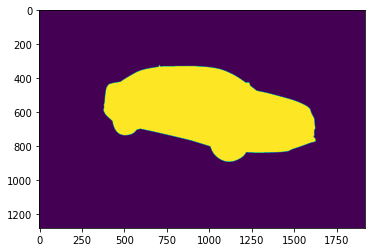

In [72]:
plt.imshow(label)

In [55]:
import torch